In [1]:
import numpy as np                
from numpy import linalg as LA    #For the varinici algorithm
import matplotlib.pyplot as plt   #For the gifs
import imageio                    #For the gifs

In [2]:
def varinoci(dots,size_domine,partition):
    ############
    # We divide the domine following the parameters, and then we travel for all the mesh clasificating  dots.
    ############
    tessellation = {}
    X = np.linspace(0, size_domine[0], partition)
    Y = np.linspace(0, size_domine[1], partition)  
    for i in range(partition):
        for j in range(partition):          
            minimo = 500  
            actual_dot = [X[i],Y[j]]
            #print(actual_dot)            
            for k in range(len(dots)):      
                value =  LA.norm(actual_dot - dots[k])
                if value < minimo:
                    minimo = value
                    k_star = k
            #print('el actual pertenece al '+str(k_star))
            if k_star in tessellation.keys():
                tessellation[k_star].append(actual_dot)
            else:
                tessellation[k_star] = [actual_dot]
     
    return tessellation

In [3]:
def new_centroids(tessellation,dots,partition,size_domine):
    ############
    # We estimate the centroids of each section.
    ###########
    new_dots=[]
    h=size_domine[0]/(partition-1)
    for i in range(len(tessellation.keys())):
        xi=np.array(tessellation[i])
        CI = (len(xi[:,0])-1)*h
        new_dots.append((1/CI)*np.sum(xi,axis=0)*h)
    return np.array(new_dots)

In [81]:
def plot_tessell(N,tessellation,new_dots,itera,imagen_names):
    ################
    # To plot the tessellation with differents colors.
    ################
    plt.figure(itera)
    for k in range(N):
        x=np.array(tessellation[k])[:,0]
        y=np.array(tessellation[k])[:,1]
        
        a=0.5 #If you want a figure more trasparent you can use a number more close to 0.
       
        plt.scatter(x, y, c = 'C'+str(k), alpha=a, s = 4 ,marker='s',linewidth = 0.1) 
    plt.scatter(new_dots[:,0], new_dots[:,1], c = 'k' , s = 15,linewidth = 0)   
    plt.axis('off')

    plt.savefig('Floyd_algorithm_'+str(itera)+'.png')
    plt.show()
    imagen_names.append('Floyd_algorithm_'+str(itera)+'.png')
    return imagen_names

In [82]:
def floyd_algoritm(Iterations,N,size_domine,partition,seed=None,plot=False,history=False):
    ###############
    # Main funtion who assambles the algorithm
    ###############
    if seed is not None:
        np.random.seed(seed)
        
    new_dots = np.random.random([N,2])*size_domine
    
    history_tessell = []
    history_dots    = [new_dots]
    imagen_names=[]

    for itera in range(Iterations):
        tessellation  =  varinoci(new_dots,size_domine,partition)
        new_dots      =  new_centroids(tessellation,new_dots,partition,size_domine)
        if plot == True:
            imagen_names = plot_tessell(N,tessellation,new_dots,itera,imagen_names)
            #print('finish plot Number:' +str(itera))
        if history==True:    
            history_tessell.append(tessellation)
            history_dots.append(new_dots)
    return imagen_names, history_tessell, history_dots

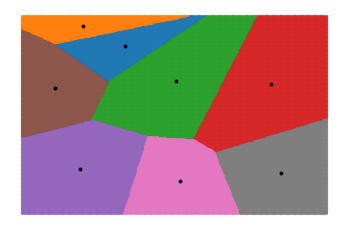

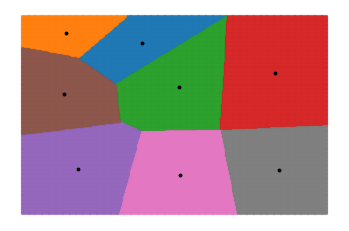

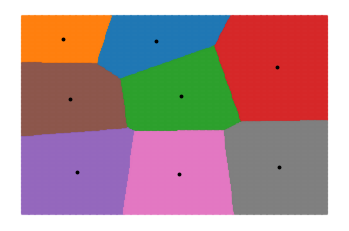

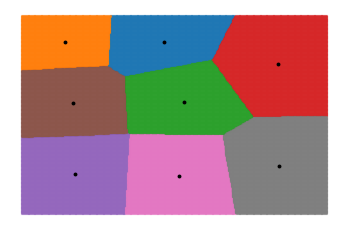

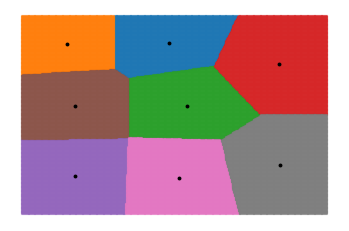

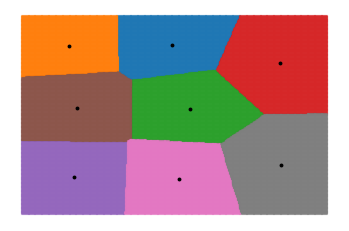

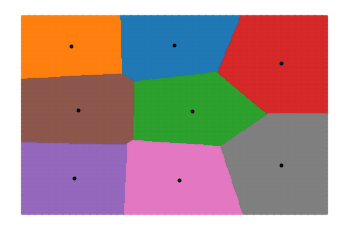

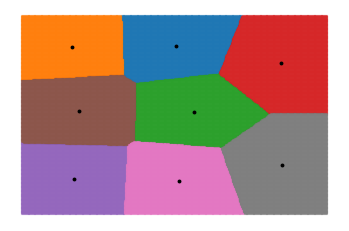

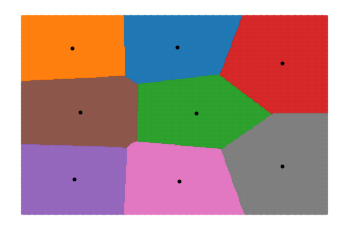

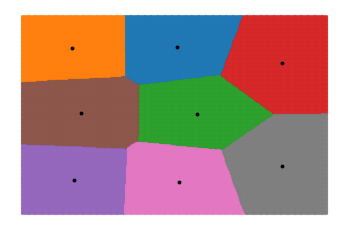

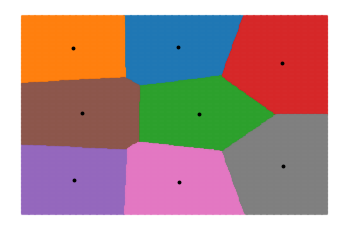

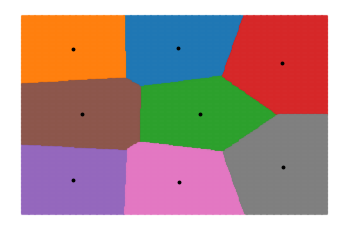

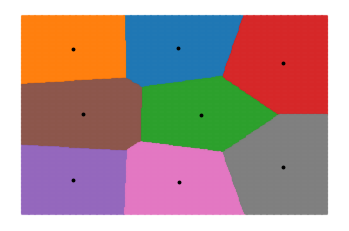

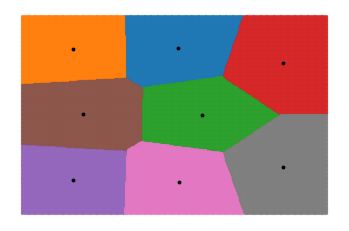

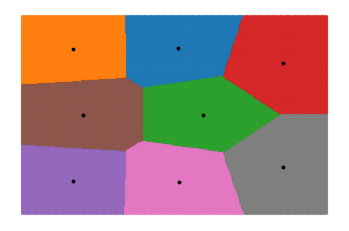

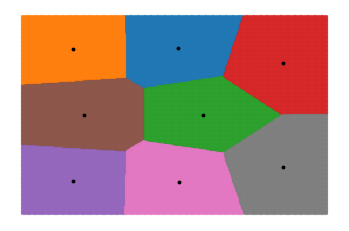

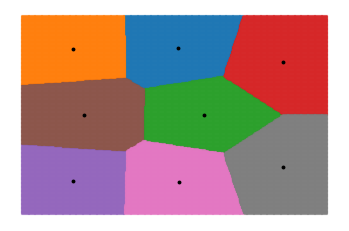

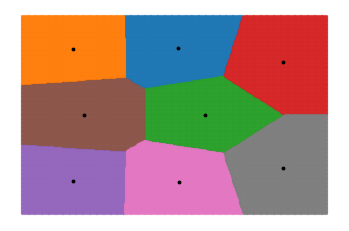

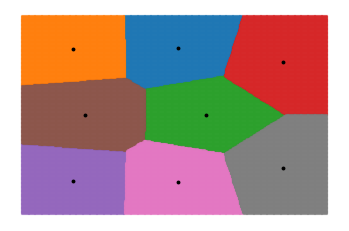

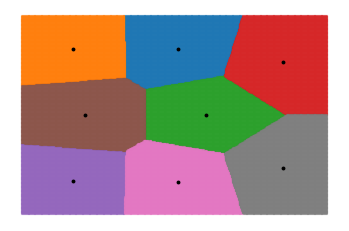

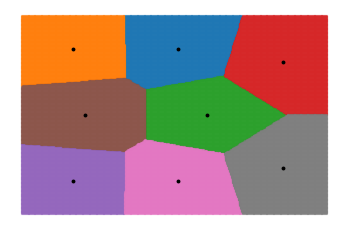

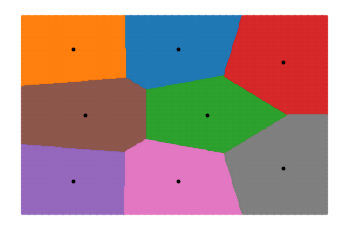

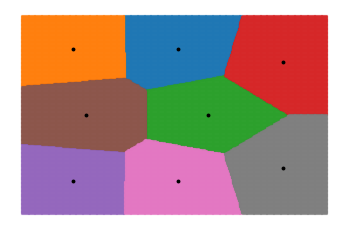

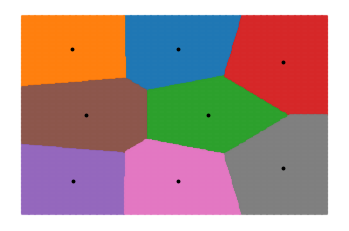

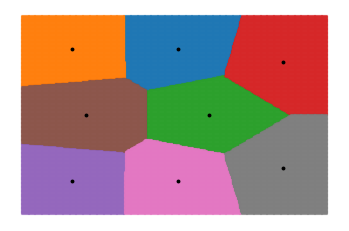

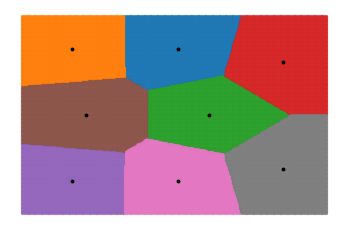

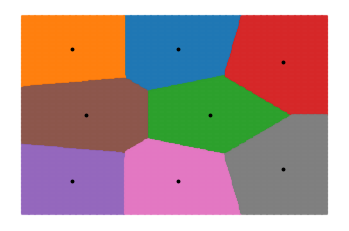

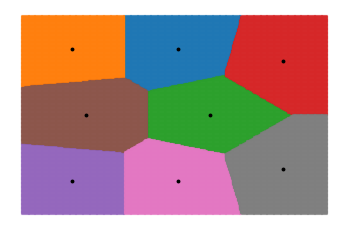

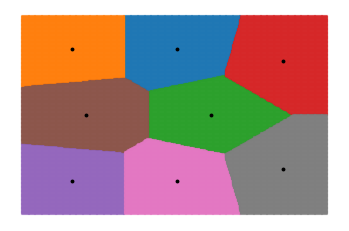

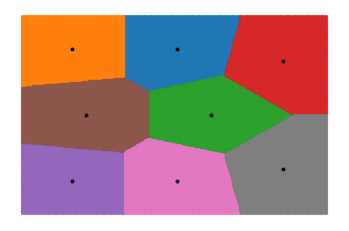

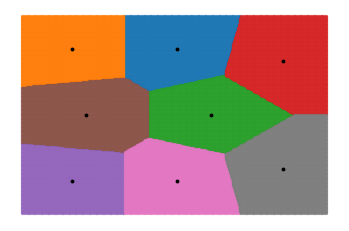

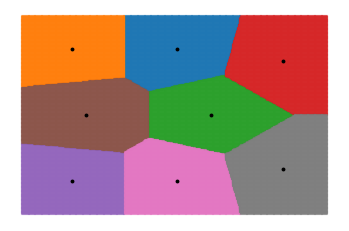

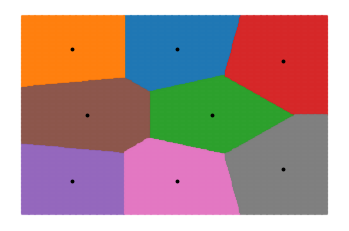

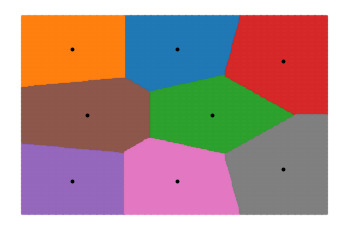

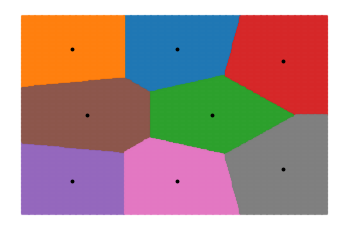

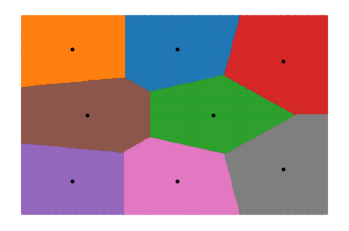

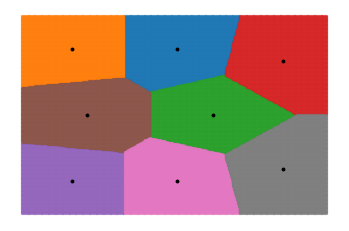

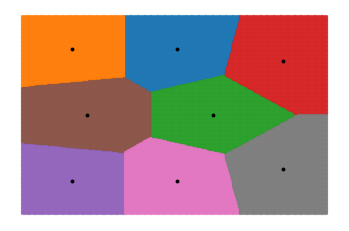

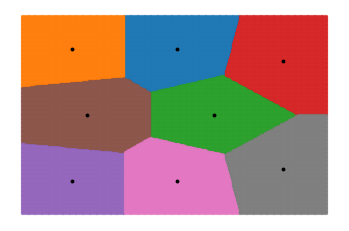

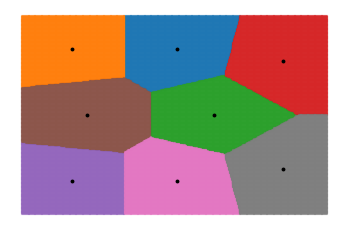

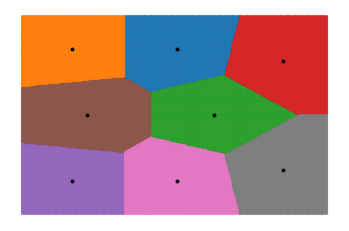

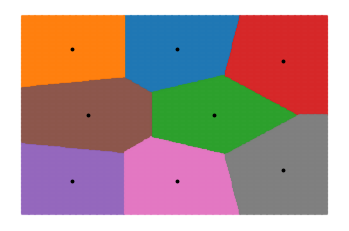

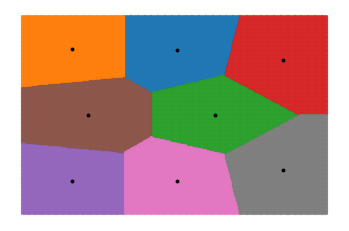

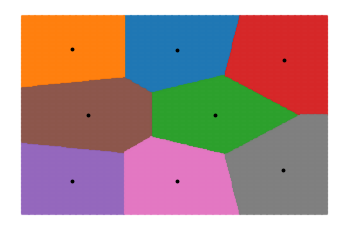

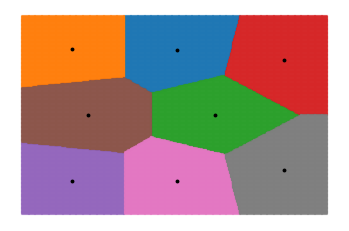

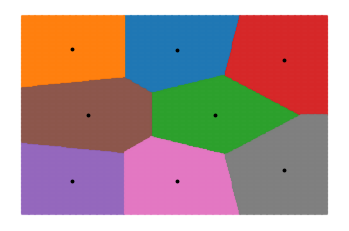

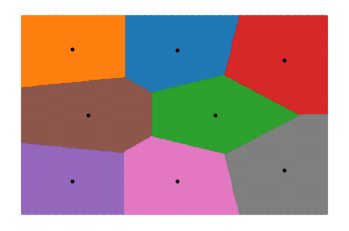

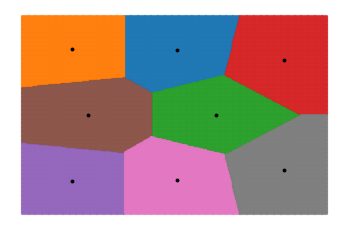

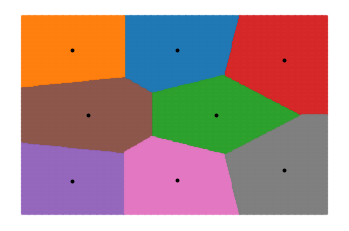

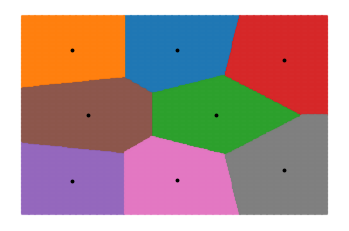

In [88]:
############### SETINGS #################

size_domine=[2,2]  #Define the size of the domine (a square with a vertix in (0,0))
N_dots = 8        #How much dots in your example you need
iterations = 50    #How much iterations
plot = True       #If you need to plot or not
history = False    #If you need the history of each iteration
seed = 5           #If you coment this line, each example will to have differents dots
partition=350       #The resolution of the mesh

########### MAIN ALGORITHM ##################


imagen_names, history_tessell, history_dots=floyd_algoritm(iterations,N_dots,size_domine,partition,seed,plot,history)


############## GIF #################
if plot is True:
    new_imagen_names=[]
    Frames=4                       #If you want an animation more slow, you can increce this parameter
    for itera in range(iterations):
        for frame in range(Frames):
            new_imagen_names.append(imagen_names[itera])

    with imageio.get_writer('Lloyd_algorithm_P'+str(partition)+'_S'+str(seed)+'_Dim'+str(size_domine[0])+'x'+str(size_domine[1])+'_I'+str(iterations)+'_N'+str(N_dots)+'.gif', mode='I') as writer:
        for filename in new_imagen_names:
            image = imageio.imread(filename)
            writer.append_data(image)
